In [1]:
import os, sys, time
import tifffile as tif
sys.path.append("/Users/emilydennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [97]:
src = "/Users/emilydennis/Desktop/lightsheet"
pre_file = os.path.join(src, "images/PMA_annotation.tif")
post_file = os.path.join(src, "images/pma_ann_in_matlas.tif")
annotations_filename = os.path.join(src,"labels_updated/PMA_ann_mouserat_vox.csv")
output= os.path.join(src,'images/pma_matlas_pctdiff.tif')
percentcsv= os.path.join(src,'images/pma_matlas_pctdiff.csv')

# If you need to determine the percent voxel change between two images follow these steps first. 

## If you already have a "percent.csv" file, skip to next section

In [77]:
pre = tif.imread(pre_file)
print("read pre-change tiff")
post = tif.imread(post_file)
print("read post-changes tiff")

read pre-change tiff
read post-changes tiff


In [78]:
np.max(pre)

614454300.0

In [82]:
# make sure your annotations have the first column as id number, 2nd as abbreviation, or else change the input below
anns=pd.read_csv(annotations_filename)
print("read annotations")

read annotations


In [85]:
df=anns.drop(columns='Unnamed: 0')
df

,id,abbr,affine_vox,mouserat_vox
0,1.0,TMv,36116,36362
1,2.0,SSp-m6b,17503,17403
2,4.0,IC,26686,25748
3,6.0,int,276697,242990
4,7.0,PSV,141030,171022
...,...,...,...,...
624,526322272.0,FRP6a,0,0
625,563807424.0,PoT,0,0
626,599626944.0,SCO,0,0
627,606826688.0,Pa4,0,0


In [86]:
df.insert(3,'pre_vox',0)
df.insert(4,'post_vox',0)


In [88]:
for i in df['id']:
    print(i)
    df.post_vox[df.index[df.id==i]] = np.size(post[post==i])
    df.pre_vox[df.index[df.id==i]] = np.size(pre[pre==i])


1.0


/Users/emilydennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/emilydennis/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


2.0
4.0
6.0
7.0
9.0
10.0
12.0
15.0
17.0
19.0
20.0
23.0
26.0
27.0
28.0
30.0
33.0
35.0
36.0
38.0
41.0
42.0
50.0
52.0
54.0
56.0
58.0
59.0
62.0
63.0
64.0
66.0
67.0
68.0
72.0
73.0
74.0
75.0
78.0
81.0
83.0
84.0
88.0
91.0
93.0
96.0
97.0
98.0
100.0
101.0
102.0
105.0
106.0
108.0
113.0
114.0
115.0
117.0
118.0
120.0
121.0
122.0
123.0
125.0
126.0
128.0
129.0
131.0
133.0
136.0
139.0
140.0
143.0
145.0
146.0
147.0
148.0
149.0
153.0
155.0
156.0
158.0
159.0
162.0
163.0
164.0
169.0
170.0
171.0
173.0
177.0
178.0
180.0
181.0
186.0
187.0
188.0
189.0
190.0
194.0
196.0
197.0
198.0
201.0
202.0
203.0
204.0
206.0
207.0
209.0
210.0
211.0
214.0
215.0
217.0
218.0
222.0
223.0
225.0
226.0
229.0
230.0
231.0
233.0
234.0
237.0
238.0
243.0
246.0
249.0
250.0
251.0
252.0
255.0
257.0
258.0
260.0
262.0
263.0
266.0
268.0
269.0
271.0
272.0
274.0
278.0
279.0
nan
nan
281.0
286.0
287.0
288.0
289.0
292.0
296.0
298.0
301.0
303.0
304.0
305.0
307.0
310.0
311.0
313.0
314.0
318.0
319.0
320.0
321.0
325.0
326.0
327.0
328.0
330.0
332.0
3

In [89]:
df

,id,abbr,affine_vox,pre_vox,post_vox,mouserat_vox
0,1.0,TMv,36116,13542,14906,36362
1,2.0,SSp-m6b,17503,9621,11267,17403
2,4.0,IC,26686,22705,24361,25748
3,6.0,int,276697,176771,156917,242990
4,7.0,PSV,141030,77756,95728,171022
...,...,...,...,...,...,...
624,526322272.0,FRP6a,0,55,0,0
625,563807424.0,PoT,0,27546,0,0
626,599626944.0,SCO,0,1479,0,0
627,606826688.0,Pa4,0,9529,0,0


In [90]:
prelen = np.sum(df.pre_vox)
postlen = np.sum(df.post_vox)
df['pre_vox_adj']=df.pre_vox/prelen
df['post_vox_adj']= df.post_vox/postlen
df

,id,abbr,affine_vox,pre_vox,post_vox,mouserat_vox,pre_vox_adj,post_vox_adj
0,1.0,TMv,36116,13542,14906,36362,0.000276,0.000286
1,2.0,SSp-m6b,17503,9621,11267,17403,0.000196,0.000216
2,4.0,IC,26686,22705,24361,25748,0.000463,0.000468
3,6.0,int,276697,176771,156917,242990,0.003605,0.003012
4,7.0,PSV,141030,77756,95728,171022,0.001586,0.001837
...,...,...,...,...,...,...,...,...
624,526322272.0,FRP6a,0,55,0,0,0.000001,0.000000
625,563807424.0,PoT,0,27546,0,0,0.000562,0.000000
626,599626944.0,SCO,0,1479,0,0,0.000030,0.000000
627,606826688.0,Pa4,0,9529,0,0,0.000194,0.000000


In [91]:
df['change'] = df['pre_vox_adj']-df['post_vox_adj']
df['change']=df.change*100

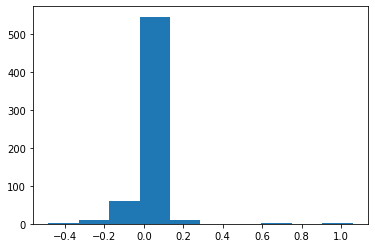

In [92]:
plt.hist(df.change)
plt.show()

In [93]:
mp = np.nanmedian(df.change)
sp = np.nanstd(df.change)

In [94]:
highmp = mp+sp
highmp

0.07545094241972343

In [95]:
lowmp = mp-sp
lowmp

-0.0740578692575604

In [96]:
df.to_csv(percentcsv)

# If you already have a percent file

In [45]:
df=pd.read_csv(percentcsv)

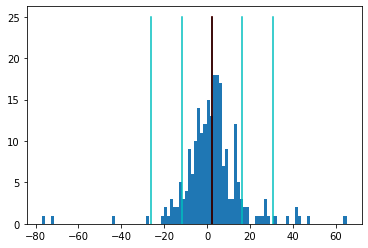

In [46]:
plt.hist(df.percent[df.affine_vox>5],bins=100)

dfmean = np.nanmean(df.percent[df.affine_vox>5])
dfmedian = np.nanmedian(df.percent[df.affine_vox>5])
dfstd = np.std(df.percent[df.affine_vox>5])
mp = dfmean + dfstd
mm = dfmean - dfstd

mp2 = dfmean + 2*dfstd
mp3 = dfmean + 3*dfstd
mm2 = dfmean - 2*dfstd
mm3 = dfmean - 3*dfstd


plt.plot([dfmean, dfmean],[0,25],'r')
plt.plot([dfmedian, dfmedian],[0,25],'k')
plt.plot([mp,mp],[0,25],'c')
plt.plot([mm,mm],[0,25],'c')
plt.plot([mp2,mp2],[0,25],'c')
plt.plot([mm2,mm2],[0,25],'c')
plt.show()

In [47]:
# want to make summary -- ideally show a ranked 3, 2, 1std>mean 
# in diff colors, and then the 
# values either written or in bar form on the right
df

,Unnamed: 0,atlas,ID,label,affine_vox,transformixed_vox,change,percent
0,1,Waxholm,171,Globus Pallidus,44,61,-17,-27.868852
1,2,Waxholm,731,Striatum,31585,31193,392,1.256692
2,3,Waxholm,221,Granule Cell Level of the Cerebellum,22698,21005,1693,8.059986
3,4,Waxholm,341,Molecular Layer of the Cerebellum,80302,76127,4175,5.484257
4,5,Tohoku,31,Amygdalohyppocampic Area,537,519,18,3.468208
...,...,...,...,...,...,...,...,...
226,229,Waxholm,882,Commissure of the Superior Colliculus,59,56,3,5.357143
227,230,Waxholm,902,Deeper Layers of the Superior Colliculus,9404,9515,-111,-1.166579
228,231,Waxholm,1082,SP5,441,441,0,0.000000
229,232,Waxholm,792,Anterior Commissure Intrabulbar part,864,838,26,3.102625


In [48]:
df2p = df[df.percent>mp]
df2p = df2p.sort_values('percent',ascending=False)
df2m = df[df.percent < mm]
df2m = df2m.sort_values('percent',ascending=False)
df2p

,Unnamed: 0,atlas,ID,label,affine_vox,transformixed_vox,change,percent
223,226,Waxholm,932,Fasciculus Retroflexus,66,40,26,65.000000
219,222,Waxholm,1142,Brachium Pontis,1688,1148,540,47.038328
214,217,Waxholm,982,Mammillothalamic Tract,436,305,131,42.950820
203,205,Waxholm,1042,Posterior Commissure,112,79,33,41.772152
104,105,Waxholm,1141,Brachium Pontis,1545,1090,455,41.743119
87,88,Waxholm,1041,Posterior Commissure,109,79,30,37.974684
195,197,Waxholm,802,Anterior Commissure anterior part,719,544,175,32.169118
202,204,Waxholm,1032,Inferior Olive/PyramidalDecusation/SP5,3967,3091,876,28.340343
224,227,Waxholm,832,Brachium of the Superior Colliculus,138,108,30,27.777778
200,202,Waxholm,852,Central Canal,80,63,17,26.984127


In [49]:
df2m=df2m.drop_duplicates('ID')

In [53]:
df2p=df2p.drop_duplicates('ID')

,Unnamed: 0,atlas,ID,label,affine_vox,transformixed_vox,change,percent
223,226,Waxholm,932,Fasciculus Retroflexus,66,40,26,65.000000
219,222,Waxholm,1142,Brachium Pontis,1688,1148,540,47.038328
214,217,Waxholm,982,Mammillothalamic Tract,436,305,131,42.950820
203,205,Waxholm,1042,Posterior Commissure,112,79,33,41.772152
104,105,Waxholm,1141,Brachium Pontis,1545,1090,455,41.743119
...,...,...,...,...,...,...,...,...
226,229,Waxholm,882,Commissure of the Superior Colliculus,59,56,3,5.357143
190,192,Waxholm,752,Substantia Nigra,1211,1150,61,5.304348
129,131,Waxholm,82,Cornu Ammonis 2,1645,1564,81,5.179028
67,68,Waxholm,231,Hypothalamic Region,9240,8796,444,5.047749


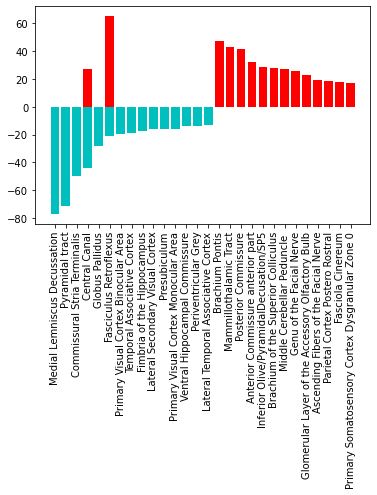

In [58]:
dfforplot = df2p
dfforplot2 = df2m
dfforplot= dfforplot.sort_values('percent',ascending=False)
dfforplot2 = dfforplot2.sort_values('percent',ascending=True)
dfforplot2 = dfforplot2.drop_duplicates('ID')
dfforplot = dfforplot.drop_duplicates('ID')
plt.bar(dfforplot2.label,dfforplot2.percent,color='c')
plt.bar(dfforplot.label,dfforplot.percent,color='r')

plt.xticks(rotation=90)
plt.show()